In [3]:
# package imports
#basics
import numpy as np
import pandas as pd

In [4]:
#misc
import gc
import time
import warnings

In [5]:
#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

In [4]:
# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

In [6]:
import json

In [7]:
from collections import defaultdict

In [5]:
#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'folium'

In [6]:
#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

In [8]:
#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
#pyo.init_notebook_mode()

In [9]:
%matplotlib inline

In [10]:
business = pd.read_csv('./csv/business.csv')

In [11]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 15 columns):
Unnamed: 0      192609 non-null int64
business_id     192609 non-null object
name            192609 non-null object
address         184927 non-null object
city            192608 non-null object
state           192609 non-null object
postal_code     191950 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 22.0+ MB


In [10]:
df = pd.read_csv('yelp_business.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [10]:
business.iloc[1]['categories']

'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood'

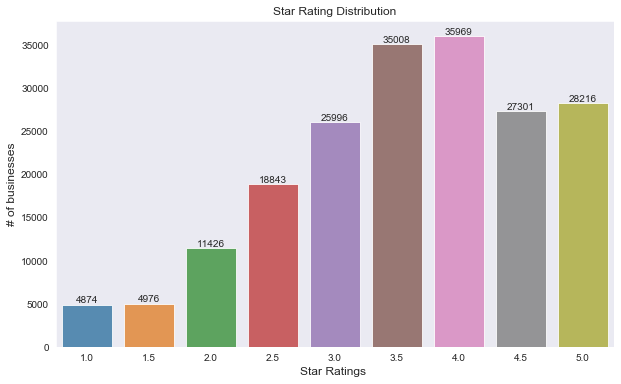

In [11]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
business.dropna(inplace=True)

In [22]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")


There are  46456  different types/categories of Businesses in Yelp!


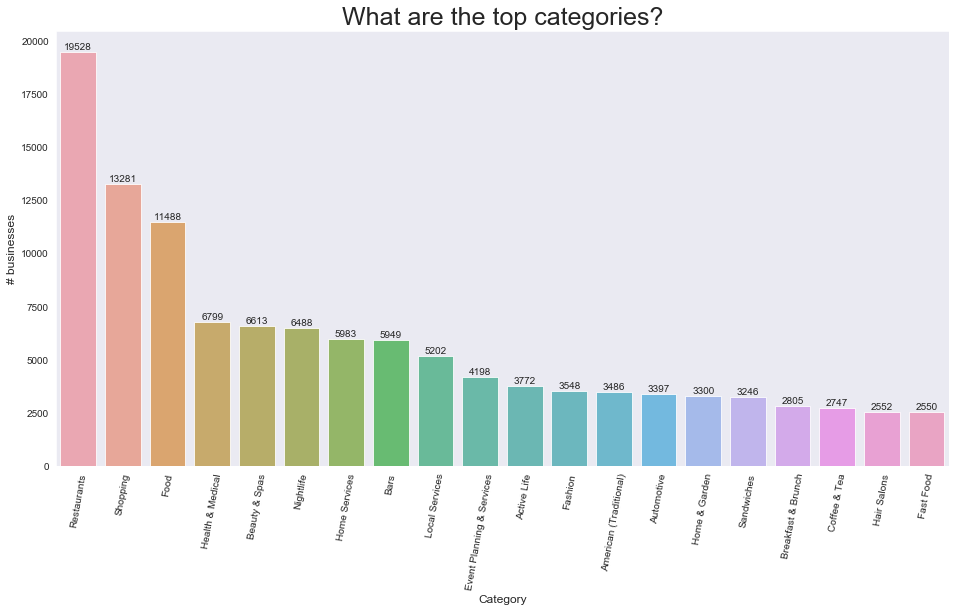

In [26]:
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.savefig('plots/category.png')
plt.show()

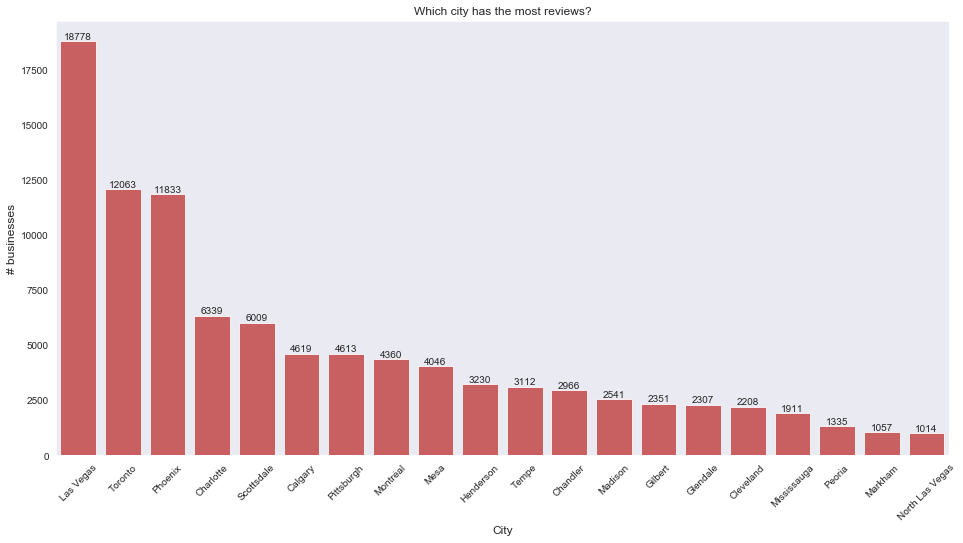

In [45]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [13]:
business.iloc[1]['categories']

'Sushi Bars, Restaurants, Japanese'

In [15]:
import re

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [19]:
l=[]
for s in business['categories']:
    
    #Remove punctuations
    s=re.sub(r'[^\w\s]','',s)
    
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)
    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)
    
    #Convert to lowercase
    s=s.lower()
    
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=' '.join(filtered_sentence)
    
    #Remove low-content adjectives
    
    
    #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
        word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    
    l.append(s)
business['ing_mod']=l

In [20]:
business.drop('Unnamed: 0', axis = 1, inplace = True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ing_mod
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",specialti food restaur dim sum import food foo...
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",sushi bar restaur japanes
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",plumb shop local servic home servic kitchen ba...
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': ""{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",ship center courier deliveri servic local serv...
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",hair salon hair stylist barber men hair salon ...


In [21]:
business['ing_mod']

1         specialti food restaur dim sum import food foo...
2                                 sushi bar restaur japanes
4         plumb shop local servic home servic kitchen ba...
5         ship center courier deliveri servic local serv...
7         hair salon hair stylist barber men hair salon ...
                                ...                        
192602                                food beer wine spirit
192603                                      restaur italian
192606    home servic contractor landscap masonryconcret...
192607                                    beauti spa barber
192608                                    massag beauti spa
Name: ing_mod, Length: 124580, dtype: object

In [45]:
business['categories'].iloc[0]

'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood'

In [46]:
business['ing_mod'].iloc[0]

'specialti food restaur dim sum import food food chines ethnic food seafood'

In [22]:
from collections import defaultdict

In [23]:
mydd = defaultdict(int)

for i in business['ing_mod']:
    for j in i.split():
        mydd[j] += 1

In [24]:
len(mydd)

1214

In [25]:
mydd['japanes']

2167

In [26]:
cuisine_list = ['Afghan', 'African', 'American', 'Argentine',
               'Arabian',
               'Asian',
               'Australian',
               'Barbeque',
               'Brazilian',
               'Breakfast',
                'Brunch',
                'British',
                'Burgers',
                'Cafes',
                'Cajun/Creole',
                'Caribbean',
                'Cuban',
                'Chinese',
                'Ethiopian',
                'French',
                'Fish & Chips',
                'German',
                'Hawaiian',
                'Nepalese',
                'Indian',
                'Indonesian',
                'Italian',
                'Japanese',
                'Kebab',
                'Korean',
                'Malaysian',
                'Mediterranean',
                'Mexican',
                'Lebanese',
                'Moroccan',
                'Persian',
                'Portuguese',
                'Russian',
                'Singaporean',
                'Thai',
                'Turkish',
                'Vegan',
                'Vegetarian',
                'Vietnamese']

In [27]:
cuisine_list

['Afghan',
 'African',
 'American',
 'Argentine',
 'Arabian',
 'Asian',
 'Australian',
 'Barbeque',
 'Brazilian',
 'Breakfast',
 'Brunch',
 'British',
 'Burgers',
 'Cafes',
 'Cajun/Creole',
 'Caribbean',
 'Cuban',
 'Chinese',
 'Ethiopian',
 'French',
 'Fish & Chips',
 'German',
 'Hawaiian',
 'Nepalese',
 'Indian',
 'Indonesian',
 'Italian',
 'Japanese',
 'Kebab',
 'Korean',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Lebanese',
 'Moroccan',
 'Persian',
 'Portuguese',
 'Russian',
 'Singaporean',
 'Thai',
 'Turkish',
 'Vegan',
 'Vegetarian',
 'Vietnamese']

In [28]:
cuisine=[]
for s in cuisine_list:
    
    #Remove punctuations
    s=re.sub(r'[^\w\s]','',s)
    
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)
    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)
    
    #Convert to lowercase
    s=s.lower()
    
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=' '.join(filtered_sentence)
    
    #Remove low-content adjectives
    
    
    #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
        word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    
    cuisine.append(s)

In [29]:
business.iloc[0]['ing_mod'] in cuisine

False

In [32]:
business['cuisine'] = business['ing_mod'].apply(lambda x:return_cuisine(x))

In [31]:
def return_cuisine(x):
    for i in x.split():
        if i in cuisine:
            return i
    return 0

In [33]:
return_cuisine(business.iloc[0]['ing_mod'])

'chines'

In [34]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ing_mod,cuisine
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",specialti food restaur dim sum import food foo...,chines
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",sushi bar restaur japanes,japanes
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",plumb shop local servic home servic kitchen ba...,0
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': ""{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",ship center courier deliveri servic local serv...,0
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",hair salon hair stylist barber men hair salon ...,0


In [35]:
business[business['cuisine'] != 0]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ing_mod,cuisine
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",specialti food restaur dim sum import food foo...,chines
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",sushi bar restaur japanes,japanes
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",restaur breakfast brunch mexican taco texmex f...,breakfast
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",italian restaur pizza chicken wing,italian
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",mexican restaur patisseriecak shop food bar ni...,mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192589,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",burger restaur fast food american new,burger
192595,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': ""...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",restaur soup chines caribbean,chines
192596,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': ""u'no'"", 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",vietnames soup restaur,vietnames
192597,C7i3HJH0nMyo2K7ZwHToQg,Las Vegas Kung Fu Academy,"11165 S Eastern Ave, Ste 110",Henderson,NV,89052,35.989577,-115.101495,4.5,15,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Chinese Martial Arts, Specialty Schools, Educa...","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",chines martial art specialti school educ sport...,chines


In [36]:
cuisine_dict = defaultdict(int)

for i in business[business['cuisine'] != 0]['cuisine']:
    cuisine_dict[i] += 1    

In [37]:
cuisine_dict

defaultdict(int,
            {'chines': 2643,
             'japanes': 1686,
             'breakfast': 3036,
             'italian': 3285,
             'mexican': 3087,
             'vegan': 412,
             'korean': 450,
             'american': 6818,
             'cafe': 1999,
             'portugues': 139,
             'mediterranean': 1068,
             'thai': 792,
             'caribbean': 370,
             'vegetarian': 481,
             'french': 561,
             'vietnames': 671,
             'burger': 3116,
             'barbequ': 960,
             'hawaiian': 164,
             'asian': 886,
             'indian': 937,
             'african': 69,
             'turkish': 68,
             'british': 102,
             'german': 78,
             'brazilian': 99,
             'ethiopian': 48,
             'cajuncreol': 176,
             'russian': 37,
             'arabian': 35,
             'afghan': 78,
             'moroccan': 33,
             'malaysian': 27,
             'l

In [38]:
# making a condensed data frame
df = business[business['cuisine'] != 0]

In [39]:
#business[business['cuisine'] != 0][['city','cuisine']].to_csv('csv/cuisine.csv')

In [40]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ing_mod,cuisine
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",specialti food restaur dim sum import food foo...,chines
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",sushi bar restaur japanes,japanes
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",restaur breakfast brunch mexican taco texmex f...,breakfast
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",italian restaur pizza chicken wing,italian
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",mexican restaur patisseriecak shop food bar ni...,mexican


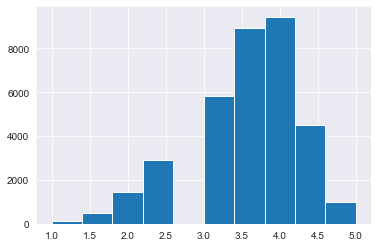

In [41]:
df['stars'].hist()

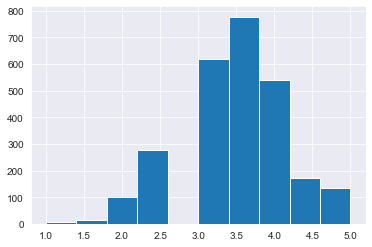

In [87]:
df[df['cuisine'] == 'chines']['stars'].hist() 

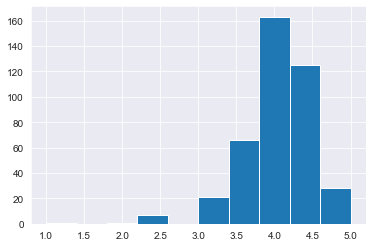

In [94]:
df[df['cuisine'] == 'vegan']['stars'].hist() 

In [90]:
updated_list = defaultdict(list)
for i in zip(df['name'], df['business_id']):
    updated_list[i[0]].append(i[1])
    
with open('business_dictionary.json', 'w') as f:
    f.write(json.dumps(updated_list))

In [39]:
df.groupby('cuisine').describe()['stars']

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
afghan,78.0,3.679487,0.552294,2.0,3.50,3.5,4.000,5.0
african,69.0,3.869565,0.689481,2.0,3.50,4.0,4.500,5.0
american,6818.0,3.445732,0.697385,1.0,3.00,3.5,4.000,5.0
arabian,35.0,4.042857,0.622748,2.5,3.50,4.0,4.500,5.0
argentin,27.0,3.740741,0.625890,2.0,3.50,3.5,4.250,4.5
asian,886.0,3.617381,0.629584,1.0,3.00,3.5,4.000,5.0
australian,9.0,3.555556,0.807947,2.0,3.50,4.0,4.000,4.5
barbequ,960.0,3.598958,0.690014,1.0,3.00,3.5,4.000,5.0
brazilian,99.0,4.217172,0.848653,1.5,3.75,4.5,5.000,5.0


In [40]:
len(df)

34655

In [41]:
#df.groupby('cuisine').describe()['stars'].to_csv('csv/cuisine_summary.csv')

In [53]:
df.groupby(['city', 'cuisine']).describe()['stars']

In [51]:
df['city'] = df['city'].apply(lambda x:x.lower())

In [54]:
def count_items(x):
    from collections import defaultdict
    mydd = defaultdict(int)
    
    for i in x:
        mydd[i] += 1
        
    return mydd

In [55]:
state_dict = count_items(df['state'])

In [57]:
state_list = []
for key, val in state_dict.items():
    if val > 10:
        state_list.append(key)

In [58]:
state_list

['ON', 'NC', 'AZ', 'OH', 'NV', 'PA', 'AB', 'QC', 'WI', 'IL', 'SC']

In [62]:
df['city'].value_counts()[:50]

toronto            4673
las vegas          3879
phoenix            2406
montréal           2218
charlotte          1642
calgary            1608
pittsburgh         1419
scottsdale         1061
mississauga         843
cleveland           801
madison             742
mesa                719
tempe               629
chandler            541
henderson           524
markham             473
glendale            422
gilbert             372
brampton            321
richmond hill       313
vaughan             297
scarborough         258
champaign           237
peoria              236
north york          219
concord             198
north las vegas     198
etobicoke           158
laval               153
surprise            145
matthews            125
akron               114
lakewood            113
mentor              112
oakville            110
newmarket           110
goodyear            110
gastonia            108
avondale            105
aurora              101
thornhill           100
huntersville    

In [7]:
df = pd.read_csv('csv/processed_business.csv')

In [8]:
df['is_open'].value_counts()

1    26189
0     8466
Name: is_open, dtype: int64

In [9]:
8466/(26189+8466)

0.24429375270523734

In [10]:
df['attributes'].iloc[0]

'{\'RestaurantsReservations\': \'True\', \'GoodForMeal\': "{\'dessert\': False, \'latenight\': False, \'lunch\': True, \'dinner\': True, \'brunch\': False, \'breakfast\': False}", \'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}", \'Caters\': \'True\', \'NoiseLevel\': "u\'loud\'", \'RestaurantsTableService\': \'True\', \'RestaurantsTakeOut\': \'True\', \'RestaurantsPriceRange2\': \'2\', \'OutdoorSeating\': \'False\', \'BikeParking\': \'False\', \'Ambience\': "{\'romantic\': False, \'intimate\': False, \'classy\': False, \'hipster\': False, \'divey\': False, \'touristy\': False, \'trendy\': False, \'upscale\': False, \'casual\': True}", \'HasTV\': \'False\', \'WiFi\': "u\'no\'", \'GoodForKids\': \'True\', \'Alcohol\': "u\'full_bar\'", \'RestaurantsAttire\': "u\'casual\'", \'RestaurantsGoodForGroups\': \'True\', \'RestaurantsDelivery\': \'False\'}'

In [11]:
df['attributes']

0        {'RestaurantsReservations': 'True', 'GoodForMe...
1        {'GoodForKids': 'True', 'NoiseLevel': "u'avera...
2        {'RestaurantsTakeOut': 'True', 'BusinessParkin...
3        {'RestaurantsPriceRange2': '2', 'BusinessAccep...
4        {'BikeParking': 'True', 'BusinessParking': "{'...
                               ...                        
34650    {'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...
34651    {'BikeParking': 'True', 'RestaurantsAttire': "...
34652    {'GoodForKids': 'True', 'WiFi': "u'no'", 'Rest...
34653    {'BusinessAcceptsCreditCards': 'True', 'GoodFo...
34654    {'OutdoorSeating': 'True', 'BikeParking': 'Tru...
Name: attributes, Length: 34655, dtype: object

In [14]:
print(df['attributes'].iloc[0])

{'RestaurantsReservations': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'Caters': 'True', 'NoiseLevel': "u'loud'", 'RestaurantsTableService': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '2', 'OutdoorSeating': 'False', 'BikeParking': 'False', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'HasTV': 'False', 'WiFi': "u'no'", 'GoodForKids': 'True', 'Alcohol': "u'full_bar'", 'RestaurantsAttire': "u'casual'", 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'False'}


In [15]:
import ast

In [19]:
df['attributes'].apply(ast.literal_eval)

0        {'RestaurantsReservations': 'True', 'GoodForMe...
1        {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...
2        {'RestaurantsTakeOut': 'True', 'BusinessParkin...
3        {'RestaurantsPriceRange2': '2', 'BusinessAccep...
4        {'BikeParking': 'True', 'BusinessParking': '{'...
                               ...                        
34650    {'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...
34651    {'BikeParking': 'True', 'RestaurantsAttire': '...
34652    {'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...
34653    {'BusinessAcceptsCreditCards': 'True', 'GoodFo...
34654    {'OutdoorSeating': 'True', 'BikeParking': 'Tru...
Name: attributes, Length: 34655, dtype: object

In [20]:
df['attributes'] = df['attributes'].apply(ast.literal_eval)

In [21]:
df['attributes'].iloc[0]

{'RestaurantsReservations': 'True',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'Caters': 'True',
 'NoiseLevel': "u'loud'",
 'RestaurantsTableService': 'True',
 'RestaurantsTakeOut': 'True',
 'RestaurantsPriceRange2': '2',
 'OutdoorSeating': 'False',
 'BikeParking': 'False',
 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
 'HasTV': 'False',
 'WiFi': "u'no'",
 'GoodForKids': 'True',
 'Alcohol': "u'full_bar'",
 'RestaurantsAttire': "u'casual'",
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsDelivery': 'False'}

In [26]:
attributes_dict = defaultdict(int)

for i in df['attributes']:
    for j in i.keys():
        attributes_dict[j] += 1

In [29]:
sorted([(val, key) for key, val in attributes_dict.items()], reverse = True)

[(32613, 'RestaurantsTakeOut'),
 (32201, 'RestaurantsPriceRange2'),
 (32016, 'RestaurantsReservations'),
 (31928, 'RestaurantsGoodForGroups'),
 (31857, 'GoodForKids'),
 (31603, 'RestaurantsDelivery'),
 (30874, 'OutdoorSeating'),
 (30644, 'RestaurantsAttire'),
 (30426, 'BusinessParking'),
 (29794, 'Ambience'),
 (29714, 'HasTV'),
 (28977, 'Alcohol'),
 (28014, 'WiFi'),
 (27438, 'NoiseLevel'),
 (26886, 'BikeParking'),
 (24366, 'Caters'),
 (22073, 'GoodForMeal'),
 (21468, 'BusinessAcceptsCreditCards'),
 (13047, 'RestaurantsTableService'),
 (6543, 'WheelchairAccessible'),
 (3477, 'DogsAllowed'),
 (3098, 'Music'),
 (3082, 'HappyHour'),
 (2833, 'GoodForDancing'),
 (2748, 'BusinessAcceptsBitcoin'),
 (2427, 'DriveThru'),
 (2238, 'BestNights'),
 (2155, 'CoatCheck'),
 (2007, 'Smoking'),
 (1010, 'BYOBCorkage'),
 (669, 'ByAppointmentOnly'),
 (468, 'Corkage'),
 (115, 'AcceptsInsurance'),
 (44, 'DietaryRestrictions'),
 (26, 'BYOB'),
 (25, 'AgesAllowed'),
 (10, 'RestaurantsCounterService'),
 (5, 'Open2

In [45]:
# RestaurantsTakeOut : True/False
# RestaurantsPriceRange2 : {'1', '2', '3', '4', 'None'}
# RestaurantsReservations : {'False', 'None', 'True'}
# RestaurantsGoodForGroups : {'False', 'None', 'True'}
# GoodForKids : {'False', 'None', 'True'}
# RestaurantsDelivery: {'False', 'None', 'True'}
# OutdoorSeating :
# RestaurantsAttire : {"'casual'", "'dressy'","'formal'", 'None', "u'casual'", "u'dressy'", "u'formal'"}



range_val = set()
for i in df['attributes']:
    for j in i.keys():
        if j == 'RestaurantsAttire':
            range_val.add(i['RestaurantsAttire'])

In [46]:
range_val

{"'casual'",
 "'dressy'",
 "'formal'",
 'None',
 "u'casual'",
 "u'dressy'",
 "u'formal'"}

In [47]:
att_list = {}
for key in attributes_dict.keys():
    range_val = set()
    for i in df['attributes']:
        for j in i.keys():
            if j == key:
                range_val.add(i[key])
                
    att_list[key] = range_val
    

In [49]:
att_list.keys()

dict_keys(['RestaurantsReservations', 'GoodForMeal', 'BusinessParking', 'Caters', 'NoiseLevel', 'RestaurantsTableService', 'RestaurantsTakeOut', 'RestaurantsPriceRange2', 'OutdoorSeating', 'BikeParking', 'Ambience', 'HasTV', 'WiFi', 'GoodForKids', 'Alcohol', 'RestaurantsAttire', 'RestaurantsGoodForGroups', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'HappyHour', 'Smoking', 'WheelchairAccessible', 'DogsAllowed', 'CoatCheck', 'Music', 'BestNights', 'BusinessAcceptsBitcoin', 'GoodForDancing', 'DriveThru', 'ByAppointmentOnly', 'AcceptsInsurance', 'Corkage', 'BYOBCorkage', 'BYOB', 'AgesAllowed', 'DietaryRestrictions', 'HairSpecializesIn', 'RestaurantsCounterService', 'Open24Hours'])

In [54]:
att_list['Alcohol']

{"'beer_and_wine'",
 "'full_bar'",
 "'none'",
 'None',
 "u'beer_and_wine'",
 "u'full_bar'",
 "u'none'"}

In [1]:
att_list

NameError: name 'att_list' is not defined